# Scenario Question: Predicting Titanic Survival
# Researchers are studying the Titanic disaster and want to build models that predict whether a
#  passenger would survive or not survive based on their information.
# - Features used:
# - Passenger class (pclass)
# - Gender (sex)
# - Age (age)
# - Number of siblings/spouses aboard (sibsp)
# - Number of parents/children aboard (parch)
# - Ticket fare (fare)
# - Label:
# - 1 = Survived
# - 0 = Died
# The researchers train three different models:
# - Logistic Regression
# - K-Nearest Neighbors (KNN) with k=5
# - Decision Tree with max depth = 4
# They then evaluate each model using a classification report (precision, recall, F1-score, accuracy).

# ❓ Questions for Learners
# - Which model performs best at predicting survival, and why?
# - How does Logistic Regression differ from Decision Tree in terms of interpretability?
# # - Why is scaling applied before training Logistic Regression and KNN, but not strictly needed
#  for Decision Trees?
# - Looking at the classification report, what do precision and recall mean in the context of survival
#  predictions?
# - Precision → Of those predicted to survive, how many actually survived?
# - Recall → Of all who truly survived, how many were correctly predicted?
# - If you were a historian, which model would you trust more to explain survival patterns, and why?

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143

Accuracy: 0.7482517482517482
KNN Results
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        87
           1       0.68      0.73      0.71        56

    accuracy                           0.76       143
   macro avg       0.75      0.76      0.75       143
weighted avg       0.77      0.76      0.76       143

Accuracy: 0.7622377622377622
Decision Tree Results
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        87
           1       0.68      0.70      0.69        56

    accuracy                           0.76       143
   macro

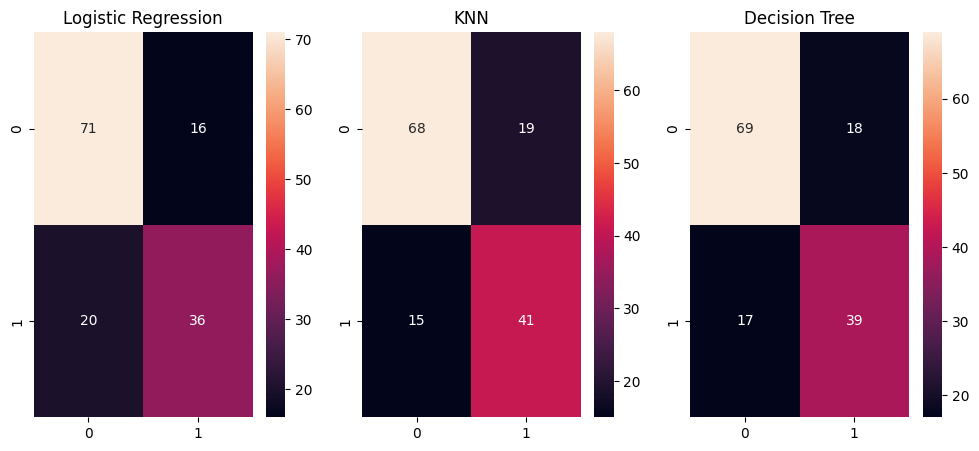

,Model,Accuracy
0,Logistic Regression,0.748252
1,KNN,0.762238
2,Decision Tree,0.755245


In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = sns.load_dataset('titanic')

df = df[['pclass','sex','age','sibsp','parch','fare','survived']]

df.dropna(inplace=True)

df['sex'] = df['sex'].map({'male':0, 'female':1})

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model1

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# model 2

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Results")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# model 3

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train) 

y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Results")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

fig, axes = plt.subplots(1, 3, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), 
            annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(confusion_matrix(y_test, y_pred_knn), 
            annot=True, fmt='d', ax=axes[1])
axes[1].set_title("KNN")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), 
            annot=True, fmt='d', ax=axes[2])
axes[2].set_title("Decision Tree")

plt.show()

#accuracy comparison
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_tree)
]

comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

comparison

#Second Question

Scenario

The university wants to analyze student performance data to:

Predict exam scores (Regression).
1.Classify students into “At Risk” vs. “On Track” categories (Classification).
2.Cluster students into groups with similar study habits (Clustering).
3.Recommend interventions (extra tutoring, workshops, counseling).

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, classification_report, accuracy_score

df = pd.read_csv("Student Success & Career Path  - Sheet1.csv")

df = df.drop(columns=['Student_ID'], errors='ignore')

if 'Gender' in df.columns:
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df = df.dropna()

X_reg = df.drop(['Final_Exam_Score', 'Pass_Fail'], axis=1)
y_reg = df['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

y_pred_reg = reg_model.predict(X_test_scaled)

print("Regression Results ")
print("R2 Score:", r2_score(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))


df['Risk_Status'] = df['Final_Exam_Score'].apply(lambda x: 1 if x >= 50 else 0)

X_clf = df.drop(['Final_Exam_Score', 'Pass_Fail', 'Risk_Status'], axis=1)
y_clf = df['Risk_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_model = LogisticRegression()
clf_model.fit(X_train_scaled, y_train)

y_pred_clf = clf_model.predict(X_test_scaled)

print("Classification Results")
print(classification_report(y_test, y_pred_clf))
print("Accuracy:", accuracy_score(y_test, y_pred_clf))


cluster_features = df[['Hours_Studied',
                       'Attendance (%)',
                       'Assignments_Submitted',
                       'Participation_Score',
                       'Previous_Sem_GPA']]

cluster_scaled = StandardScaler().fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

def recommend(row):
    if row['Final_Exam_Score'] < 50:
        return "Extra Tutoring"
    elif row['Attendance (%)'] < 60:
        return "Attendance Counseling"
    elif row['Participation_Score'] < 40:
        return "Engagement Workshop"
    elif row['Career_Readiness_Score'] < 50:
        return "Career Counseling"
    else:
        return "No Immediate Action"

df['Recommendation'] = df.apply(recommend, axis=1)

df[['Final_Exam_Score', 'Risk_Status', 'Cluster', 'Recommendation']].head()

Regression Results 
R2 Score: 0.9455693142315343
RMSE: 2.6931188014359946
Classification Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0

Cluster Distribution:
Cluster
0    8
1    7
2    5
Name: count, dtype: int64


,Final_Exam_Score,Risk_Status,Cluster,Recommendation
0,78,1,0,No Immediate Action
1,55,1,2,Career Counseling
2,88,1,0,No Immediate Action
3,45,0,1,Extra Tutoring
4,70,1,2,No Immediate Action
